In [33]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt


In [34]:
from sklearn.datasets import load_boston

In [35]:
boston = load_boston()

In [36]:
x = boston.data
x.shape

(506, 13)

In [37]:
y = boston.target

In [38]:
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [39]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [24]:
# ['{:f}'.format(x) for x in x[0]]


['0.006320']

In [40]:
type(boston.data)

numpy.ndarray

In [42]:
len(x[:,1])

506

In [43]:
x.shape

(506, 13)

In [28]:
# respounder = x[:,1]

In [14]:
# predictors = np.delete(x, 0, 1) 

In [15]:
# print(predictors)

In [16]:
# predictors.shape

In [17]:
x=np.reshape(x, (-1,1))
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [17]:
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


In [22]:
history = model.fit(x,y, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)


Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 37us/step - loss: 47.0635 - mean_squared_error: 47.0635 - mean_absolute_error: 4.9433 - val_loss: 53.9429 - val_mean_squared_error: 53.9429 - val_mean_absolute_error: 5.7208
Epoch 2/1000
404/404 [==============================] - 0s 37us/step - loss: 46.8406 - mean_squared_error: 46.8406 - mean_absolute_error: 4.9375 - val_loss: 54.9383 - val_mean_squared_error: 54.9383 - val_mean_absolute_error: 5.7508
Epoch 3/1000
404/404 [==============================] - 0s 39us/step - loss: 46.5423 - mean_squared_error: 46.5423 - mean_absolute_error: 4.9171 - val_loss: 54.0744 - val_mean_squared_error: 54.0744 - val_mean_absolute_error: 5.7277
Epoch 4/1000
404/404 [==============================] - 0s 38us/step - loss: 46.2468 - mean_squared_error: 46.2468 - mean_absolute_error: 4.9288 - val_loss: 53.4128 - val_mean_squared_error: 53.4128 - val_mean_absolute_error: 5.6993
Epoch 5/1000
404/404 [

Epoch 36/1000
404/404 [==============================] - 0s 34us/step - loss: 40.2327 - mean_squared_error: 40.2327 - mean_absolute_error: 4.5988 - val_loss: 48.5903 - val_mean_squared_error: 48.5903 - val_mean_absolute_error: 5.5304
Epoch 37/1000
404/404 [==============================] - 0s 34us/step - loss: 40.1572 - mean_squared_error: 40.1572 - mean_absolute_error: 4.5738 - val_loss: 49.7778 - val_mean_squared_error: 49.7778 - val_mean_absolute_error: 5.6615
Epoch 38/1000
404/404 [==============================] - 0s 34us/step - loss: 39.6340 - mean_squared_error: 39.6340 - mean_absolute_error: 4.6197 - val_loss: 50.0817 - val_mean_squared_error: 50.0817 - val_mean_absolute_error: 5.6975
Epoch 39/1000
404/404 [==============================] - 0s 28us/step - loss: 39.5582 - mean_squared_error: 39.5582 - mean_absolute_error: 4.6443 - val_loss: 50.0064 - val_mean_squared_error: 50.0064 - val_mean_absolute_error: 5.6713
Epoch 40/1000
404/404 [==============================] - 0s 29us

404/404 [==============================] - 0s 32us/step - loss: 36.2655 - mean_squared_error: 36.2655 - mean_absolute_error: 4.4475 - val_loss: 45.7799 - val_mean_squared_error: 45.7799 - val_mean_absolute_error: 5.5267
Epoch 72/1000
404/404 [==============================] - 0s 33us/step - loss: 36.1746 - mean_squared_error: 36.1746 - mean_absolute_error: 4.5457 - val_loss: 44.2918 - val_mean_squared_error: 44.2918 - val_mean_absolute_error: 5.4782
Epoch 73/1000
404/404 [==============================] - 0s 32us/step - loss: 37.2193 - mean_squared_error: 37.2193 - mean_absolute_error: 4.4378 - val_loss: 43.9480 - val_mean_squared_error: 43.9480 - val_mean_absolute_error: 5.5447
Epoch 74/1000
404/404 [==============================] - 0s 35us/step - loss: 36.8912 - mean_squared_error: 36.8912 - mean_absolute_error: 4.6186 - val_loss: 44.8634 - val_mean_squared_error: 44.8634 - val_mean_absolute_error: 5.4536
Epoch 75/1000
404/404 [==============================] - 0s 40us/step - loss: 

404/404 [==============================] - 0s 36us/step - loss: 34.3597 - mean_squared_error: 34.3597 - mean_absolute_error: 4.5276 - val_loss: 43.5357 - val_mean_squared_error: 43.5357 - val_mean_absolute_error: 5.3605
Epoch 107/1000
404/404 [==============================] - 0s 35us/step - loss: 35.0813 - mean_squared_error: 35.0813 - mean_absolute_error: 4.3281 - val_loss: 44.4717 - val_mean_squared_error: 44.4717 - val_mean_absolute_error: 5.7166
Epoch 108/1000
404/404 [==============================] - 0s 32us/step - loss: 36.0464 - mean_squared_error: 36.0464 - mean_absolute_error: 4.7150 - val_loss: 43.9076 - val_mean_squared_error: 43.9076 - val_mean_absolute_error: 5.4514
Epoch 109/1000
404/404 [==============================] - 0s 36us/step - loss: 33.8186 - mean_squared_error: 33.8186 - mean_absolute_error: 4.2955 - val_loss: 45.1443 - val_mean_squared_error: 45.1443 - val_mean_absolute_error: 5.5534
Epoch 110/1000
404/404 [==============================] - 0s 36us/step - lo

Epoch 141/1000
404/404 [==============================] - 0s 36us/step - loss: 32.1538 - mean_squared_error: 32.1538 - mean_absolute_error: 4.3127 - val_loss: 45.0966 - val_mean_squared_error: 45.0966 - val_mean_absolute_error: 5.5117
Epoch 142/1000
404/404 [==============================] - 0s 37us/step - loss: 31.6868 - mean_squared_error: 31.6868 - mean_absolute_error: 4.2687 - val_loss: 46.8356 - val_mean_squared_error: 46.8356 - val_mean_absolute_error: 5.5576
Epoch 143/1000
404/404 [==============================] - 0s 37us/step - loss: 32.2929 - mean_squared_error: 32.2929 - mean_absolute_error: 4.1989 - val_loss: 45.4221 - val_mean_squared_error: 45.4221 - val_mean_absolute_error: 5.5640
Epoch 144/1000
404/404 [==============================] - 0s 35us/step - loss: 31.5865 - mean_squared_error: 31.5865 - mean_absolute_error: 4.2363 - val_loss: 44.6586 - val_mean_squared_error: 44.6586 - val_mean_absolute_error: 5.4647
Epoch 145/1000
404/404 [==============================] - 0s

Epoch 176/1000
404/404 [==============================] - 0s 34us/step - loss: 30.0441 - mean_squared_error: 30.0441 - mean_absolute_error: 4.0921 - val_loss: 43.1562 - val_mean_squared_error: 43.1562 - val_mean_absolute_error: 5.3532
Epoch 177/1000
404/404 [==============================] - 0s 35us/step - loss: 30.1155 - mean_squared_error: 30.1155 - mean_absolute_error: 4.0732 - val_loss: 43.7156 - val_mean_squared_error: 43.7156 - val_mean_absolute_error: 5.3281
Epoch 178/1000
404/404 [==============================] - 0s 35us/step - loss: 29.5516 - mean_squared_error: 29.5516 - mean_absolute_error: 4.0626 - val_loss: 41.9802 - val_mean_squared_error: 41.9802 - val_mean_absolute_error: 5.2604
Epoch 179/1000
404/404 [==============================] - 0s 36us/step - loss: 29.4704 - mean_squared_error: 29.4704 - mean_absolute_error: 4.0553 - val_loss: 46.7381 - val_mean_squared_error: 46.7381 - val_mean_absolute_error: 5.4359
Epoch 180/1000
404/404 [==============================] - 0s

Epoch 211/1000
404/404 [==============================] - 0s 37us/step - loss: 29.2845 - mean_squared_error: 29.2845 - mean_absolute_error: 3.9727 - val_loss: 43.0918 - val_mean_squared_error: 43.0918 - val_mean_absolute_error: 5.3381
Epoch 212/1000
404/404 [==============================] - 0s 38us/step - loss: 28.6469 - mean_squared_error: 28.6469 - mean_absolute_error: 4.0463 - val_loss: 44.8322 - val_mean_squared_error: 44.8322 - val_mean_absolute_error: 5.3510
Epoch 213/1000
404/404 [==============================] - 0s 33us/step - loss: 28.1820 - mean_squared_error: 28.1820 - mean_absolute_error: 3.9707 - val_loss: 42.6716 - val_mean_squared_error: 42.6716 - val_mean_absolute_error: 5.2744
Epoch 214/1000
404/404 [==============================] - 0s 36us/step - loss: 28.4962 - mean_squared_error: 28.4962 - mean_absolute_error: 3.9576 - val_loss: 41.9389 - val_mean_squared_error: 41.9389 - val_mean_absolute_error: 5.2394
Epoch 215/1000
404/404 [==============================] - 0s

Epoch 246/1000
404/404 [==============================] - 0s 36us/step - loss: 27.3483 - mean_squared_error: 27.3483 - mean_absolute_error: 3.8529 - val_loss: 36.7794 - val_mean_squared_error: 36.7794 - val_mean_absolute_error: 4.9098
Epoch 247/1000
404/404 [==============================] - 0s 39us/step - loss: 26.8480 - mean_squared_error: 26.8480 - mean_absolute_error: 3.8834 - val_loss: 36.3472 - val_mean_squared_error: 36.3472 - val_mean_absolute_error: 4.8204
Epoch 248/1000
404/404 [==============================] - 0s 33us/step - loss: 26.7888 - mean_squared_error: 26.7888 - mean_absolute_error: 3.8397 - val_loss: 38.1504 - val_mean_squared_error: 38.1504 - val_mean_absolute_error: 4.9970
Epoch 249/1000
404/404 [==============================] - 0s 36us/step - loss: 27.1667 - mean_squared_error: 27.1667 - mean_absolute_error: 3.9418 - val_loss: 42.1291 - val_mean_squared_error: 42.1291 - val_mean_absolute_error: 5.1123
Epoch 250/1000
404/404 [==============================] - 0s

Epoch 281/1000
404/404 [==============================] - 0s 35us/step - loss: 26.3174 - mean_squared_error: 26.3174 - mean_absolute_error: 3.7792 - val_loss: 34.6355 - val_mean_squared_error: 34.6355 - val_mean_absolute_error: 4.6878
Epoch 282/1000
404/404 [==============================] - 0s 34us/step - loss: 26.0188 - mean_squared_error: 26.0188 - mean_absolute_error: 3.8454 - val_loss: 37.0268 - val_mean_squared_error: 37.0268 - val_mean_absolute_error: 4.8076
Epoch 283/1000
404/404 [==============================] - 0s 37us/step - loss: 25.9812 - mean_squared_error: 25.9812 - mean_absolute_error: 3.7594 - val_loss: 34.9671 - val_mean_squared_error: 34.9671 - val_mean_absolute_error: 4.7283
Epoch 284/1000
404/404 [==============================] - 0s 34us/step - loss: 26.1421 - mean_squared_error: 26.1421 - mean_absolute_error: 3.8555 - val_loss: 32.3039 - val_mean_squared_error: 32.3039 - val_mean_absolute_error: 4.5755
Epoch 285/1000
404/404 [==============================] - 0s

Epoch 316/1000
404/404 [==============================] - 0s 39us/step - loss: 25.1753 - mean_squared_error: 25.1753 - mean_absolute_error: 3.7283 - val_loss: 32.1604 - val_mean_squared_error: 32.1604 - val_mean_absolute_error: 4.4227
Epoch 317/1000
404/404 [==============================] - 0s 36us/step - loss: 25.4848 - mean_squared_error: 25.4848 - mean_absolute_error: 3.7798 - val_loss: 33.9837 - val_mean_squared_error: 33.9837 - val_mean_absolute_error: 4.5291
Epoch 318/1000
404/404 [==============================] - 0s 37us/step - loss: 25.4212 - mean_squared_error: 25.4212 - mean_absolute_error: 3.7091 - val_loss: 31.1083 - val_mean_squared_error: 31.1083 - val_mean_absolute_error: 4.4541
Epoch 319/1000
404/404 [==============================] - 0s 40us/step - loss: 28.3087 - mean_squared_error: 28.3087 - mean_absolute_error: 4.1500 - val_loss: 34.5899 - val_mean_squared_error: 34.5899 - val_mean_absolute_error: 4.5479
Epoch 320/1000
404/404 [==============================] - 0s

Epoch 351/1000
404/404 [==============================] - 0s 36us/step - loss: 24.6890 - mean_squared_error: 24.6890 - mean_absolute_error: 3.6749 - val_loss: 27.6300 - val_mean_squared_error: 27.6300 - val_mean_absolute_error: 4.0423
Epoch 352/1000
404/404 [==============================] - 0s 38us/step - loss: 24.5989 - mean_squared_error: 24.5989 - mean_absolute_error: 3.6767 - val_loss: 27.3080 - val_mean_squared_error: 27.3080 - val_mean_absolute_error: 4.0223
Epoch 353/1000
404/404 [==============================] - 0s 36us/step - loss: 24.6880 - mean_squared_error: 24.6880 - mean_absolute_error: 3.6928 - val_loss: 28.6026 - val_mean_squared_error: 28.6026 - val_mean_absolute_error: 4.0925
Epoch 354/1000
404/404 [==============================] - 0s 36us/step - loss: 24.6280 - mean_squared_error: 24.6280 - mean_absolute_error: 3.6479 - val_loss: 28.8929 - val_mean_squared_error: 28.8929 - val_mean_absolute_error: 4.1069
Epoch 355/1000
404/404 [==============================] - 0s

Epoch 386/1000
404/404 [==============================] - 0s 38us/step - loss: 24.2432 - mean_squared_error: 24.2432 - mean_absolute_error: 3.6399 - val_loss: 28.2281 - val_mean_squared_error: 28.2281 - val_mean_absolute_error: 4.0253
Epoch 387/1000
404/404 [==============================] - 0s 37us/step - loss: 24.3230 - mean_squared_error: 24.3230 - mean_absolute_error: 3.6652 - val_loss: 29.3941 - val_mean_squared_error: 29.3941 - val_mean_absolute_error: 4.0736
Epoch 388/1000
404/404 [==============================] - 0s 37us/step - loss: 26.6516 - mean_squared_error: 26.6516 - mean_absolute_error: 3.7182 - val_loss: 25.9761 - val_mean_squared_error: 25.9761 - val_mean_absolute_error: 3.9573
Epoch 389/1000
404/404 [==============================] - 0s 36us/step - loss: 26.3758 - mean_squared_error: 26.3758 - mean_absolute_error: 3.9303 - val_loss: 27.5726 - val_mean_squared_error: 27.5726 - val_mean_absolute_error: 3.9922
Epoch 390/1000
404/404 [==============================] - 0s

Epoch 421/1000
404/404 [==============================] - 0s 37us/step - loss: 24.4540 - mean_squared_error: 24.4540 - mean_absolute_error: 3.6222 - val_loss: 25.2700 - val_mean_squared_error: 25.2700 - val_mean_absolute_error: 3.7684
Epoch 422/1000
404/404 [==============================] - 0s 33us/step - loss: 23.7645 - mean_squared_error: 23.7645 - mean_absolute_error: 3.6022 - val_loss: 25.3206 - val_mean_squared_error: 25.3206 - val_mean_absolute_error: 3.7027
Epoch 423/1000
404/404 [==============================] - 0s 38us/step - loss: 23.9525 - mean_squared_error: 23.9525 - mean_absolute_error: 3.5833 - val_loss: 24.9153 - val_mean_squared_error: 24.9153 - val_mean_absolute_error: 3.7062
Epoch 424/1000
404/404 [==============================] - 0s 35us/step - loss: 23.9967 - mean_squared_error: 23.9967 - mean_absolute_error: 3.6072 - val_loss: 27.5149 - val_mean_squared_error: 27.5149 - val_mean_absolute_error: 3.8983
Epoch 425/1000
404/404 [==============================] - 0s

Epoch 456/1000
404/404 [==============================] - 0s 37us/step - loss: 25.5468 - mean_squared_error: 25.5468 - mean_absolute_error: 3.7058 - val_loss: 25.1597 - val_mean_squared_error: 25.1597 - val_mean_absolute_error: 3.9072
Epoch 457/1000
404/404 [==============================] - 0s 38us/step - loss: 24.6256 - mean_squared_error: 24.6256 - mean_absolute_error: 3.7245 - val_loss: 25.4523 - val_mean_squared_error: 25.4523 - val_mean_absolute_error: 3.7081
Epoch 458/1000
404/404 [==============================] - 0s 38us/step - loss: 23.8503 - mean_squared_error: 23.8503 - mean_absolute_error: 3.5469 - val_loss: 24.2554 - val_mean_squared_error: 24.2554 - val_mean_absolute_error: 3.7206
Epoch 459/1000
404/404 [==============================] - 0s 37us/step - loss: 23.8701 - mean_squared_error: 23.8701 - mean_absolute_error: 3.6274 - val_loss: 25.0940 - val_mean_squared_error: 25.0940 - val_mean_absolute_error: 3.6782
Epoch 460/1000
404/404 [==============================] - 0s

Epoch 491/1000
404/404 [==============================] - 0s 36us/step - loss: 23.8115 - mean_squared_error: 23.8115 - mean_absolute_error: 3.6809 - val_loss: 22.4229 - val_mean_squared_error: 22.4229 - val_mean_absolute_error: 3.4640
Epoch 492/1000
404/404 [==============================] - 0s 37us/step - loss: 23.7955 - mean_squared_error: 23.7955 - mean_absolute_error: 3.5558 - val_loss: 22.1277 - val_mean_squared_error: 22.1277 - val_mean_absolute_error: 3.4893
Epoch 493/1000
404/404 [==============================] - 0s 37us/step - loss: 23.4309 - mean_squared_error: 23.4309 - mean_absolute_error: 3.5416 - val_loss: 22.9839 - val_mean_squared_error: 22.9839 - val_mean_absolute_error: 3.4949
Epoch 494/1000
404/404 [==============================] - 0s 37us/step - loss: 23.7477 - mean_squared_error: 23.7477 - mean_absolute_error: 3.5077 - val_loss: 22.9508 - val_mean_squared_error: 22.9508 - val_mean_absolute_error: 3.5282
Epoch 495/1000
404/404 [==============================] - 0s

Epoch 526/1000
404/404 [==============================] - 0s 33us/step - loss: 23.1056 - mean_squared_error: 23.1056 - mean_absolute_error: 3.5243 - val_loss: 22.1310 - val_mean_squared_error: 22.1310 - val_mean_absolute_error: 3.5392
Epoch 527/1000
404/404 [==============================] - 0s 34us/step - loss: 23.3959 - mean_squared_error: 23.3959 - mean_absolute_error: 3.5892 - val_loss: 23.1786 - val_mean_squared_error: 23.1786 - val_mean_absolute_error: 3.4982
Epoch 528/1000
404/404 [==============================] - 0s 31us/step - loss: 23.1192 - mean_squared_error: 23.1192 - mean_absolute_error: 3.5304 - val_loss: 22.7562 - val_mean_squared_error: 22.7562 - val_mean_absolute_error: 3.4964
Epoch 529/1000
404/404 [==============================] - 0s 37us/step - loss: 23.2408 - mean_squared_error: 23.2408 - mean_absolute_error: 3.5096 - val_loss: 23.1924 - val_mean_squared_error: 23.1924 - val_mean_absolute_error: 3.5365
Epoch 530/1000
404/404 [==============================] - 0s

Epoch 561/1000
404/404 [==============================] - 0s 34us/step - loss: 23.7519 - mean_squared_error: 23.7519 - mean_absolute_error: 3.5630 - val_loss: 22.3427 - val_mean_squared_error: 22.3427 - val_mean_absolute_error: 3.4552
Epoch 562/1000
404/404 [==============================] - 0s 35us/step - loss: 23.5395 - mean_squared_error: 23.5395 - mean_absolute_error: 3.4864 - val_loss: 23.3977 - val_mean_squared_error: 23.3977 - val_mean_absolute_error: 3.7819
Epoch 563/1000
404/404 [==============================] - 0s 33us/step - loss: 26.4314 - mean_squared_error: 26.4314 - mean_absolute_error: 4.0206 - val_loss: 22.3810 - val_mean_squared_error: 22.3810 - val_mean_absolute_error: 3.4293
Epoch 564/1000
404/404 [==============================] - 0s 39us/step - loss: 24.6465 - mean_squared_error: 24.6465 - mean_absolute_error: 3.5870 - val_loss: 24.7435 - val_mean_squared_error: 24.7435 - val_mean_absolute_error: 3.9875
Epoch 565/1000
404/404 [==============================] - 0s

Epoch 596/1000
404/404 [==============================] - 0s 32us/step - loss: 22.8639 - mean_squared_error: 22.8639 - mean_absolute_error: 3.4838 - val_loss: 22.9691 - val_mean_squared_error: 22.9691 - val_mean_absolute_error: 3.4795
Epoch 597/1000
404/404 [==============================] - 0s 36us/step - loss: 23.3927 - mean_squared_error: 23.3927 - mean_absolute_error: 3.4764 - val_loss: 21.9145 - val_mean_squared_error: 21.9145 - val_mean_absolute_error: 3.5653
Epoch 598/1000
404/404 [==============================] - 0s 35us/step - loss: 23.2356 - mean_squared_error: 23.2356 - mean_absolute_error: 3.5928 - val_loss: 22.4177 - val_mean_squared_error: 22.4177 - val_mean_absolute_error: 3.4612
Epoch 599/1000
404/404 [==============================] - 0s 42us/step - loss: 23.2843 - mean_squared_error: 23.2843 - mean_absolute_error: 3.5604 - val_loss: 25.2283 - val_mean_squared_error: 25.2283 - val_mean_absolute_error: 3.6813
Epoch 600/1000
404/404 [==============================] - 0s

Epoch 631/1000
404/404 [==============================] - 0s 36us/step - loss: 22.9092 - mean_squared_error: 22.9092 - mean_absolute_error: 3.4581 - val_loss: 22.5898 - val_mean_squared_error: 22.5898 - val_mean_absolute_error: 3.5283
Epoch 632/1000
404/404 [==============================] - 0s 33us/step - loss: 22.8337 - mean_squared_error: 22.8337 - mean_absolute_error: 3.5387 - val_loss: 22.5099 - val_mean_squared_error: 22.5099 - val_mean_absolute_error: 3.5186
Epoch 633/1000
404/404 [==============================] - 0s 37us/step - loss: 22.5847 - mean_squared_error: 22.5847 - mean_absolute_error: 3.4677 - val_loss: 22.4445 - val_mean_squared_error: 22.4445 - val_mean_absolute_error: 3.4858
Epoch 634/1000
404/404 [==============================] - 0s 33us/step - loss: 22.5177 - mean_squared_error: 22.5177 - mean_absolute_error: 3.4330 - val_loss: 23.6437 - val_mean_squared_error: 23.6437 - val_mean_absolute_error: 3.6390
Epoch 635/1000
404/404 [==============================] - 0s

Epoch 666/1000
404/404 [==============================] - 0s 39us/step - loss: 22.6471 - mean_squared_error: 22.6471 - mean_absolute_error: 3.5328 - val_loss: 23.3687 - val_mean_squared_error: 23.3687 - val_mean_absolute_error: 3.5623
Epoch 667/1000
404/404 [==============================] - 0s 33us/step - loss: 22.5129 - mean_squared_error: 22.5129 - mean_absolute_error: 3.5036 - val_loss: 20.8981 - val_mean_squared_error: 20.8981 - val_mean_absolute_error: 3.4904
Epoch 668/1000
404/404 [==============================] - 0s 38us/step - loss: 22.4085 - mean_squared_error: 22.4085 - mean_absolute_error: 3.4763 - val_loss: 21.3593 - val_mean_squared_error: 21.3593 - val_mean_absolute_error: 3.4331
Epoch 669/1000
404/404 [==============================] - 0s 37us/step - loss: 22.3815 - mean_squared_error: 22.3815 - mean_absolute_error: 3.4291 - val_loss: 22.5332 - val_mean_squared_error: 22.5332 - val_mean_absolute_error: 3.5589
Epoch 670/1000
404/404 [==============================] - 0s

Epoch 701/1000
404/404 [==============================] - 0s 36us/step - loss: 21.8133 - mean_squared_error: 21.8133 - mean_absolute_error: 3.3555 - val_loss: 23.9585 - val_mean_squared_error: 23.9585 - val_mean_absolute_error: 3.6532
Epoch 702/1000
404/404 [==============================] - 0s 38us/step - loss: 22.1259 - mean_squared_error: 22.1259 - mean_absolute_error: 3.4240 - val_loss: 24.4295 - val_mean_squared_error: 24.4295 - val_mean_absolute_error: 3.6411
Epoch 703/1000
404/404 [==============================] - 0s 38us/step - loss: 22.3151 - mean_squared_error: 22.3151 - mean_absolute_error: 3.4317 - val_loss: 24.1476 - val_mean_squared_error: 24.1476 - val_mean_absolute_error: 3.6918
Epoch 704/1000
404/404 [==============================] - 0s 39us/step - loss: 27.4946 - mean_squared_error: 27.4946 - mean_absolute_error: 4.1060 - val_loss: 30.2232 - val_mean_squared_error: 30.2232 - val_mean_absolute_error: 4.1680
Epoch 705/1000
404/404 [==============================] - 0s

Epoch 736/1000
404/404 [==============================] - 0s 38us/step - loss: 21.9747 - mean_squared_error: 21.9747 - mean_absolute_error: 3.3556 - val_loss: 23.5086 - val_mean_squared_error: 23.5086 - val_mean_absolute_error: 3.6227
Epoch 737/1000
404/404 [==============================] - 0s 41us/step - loss: 21.3679 - mean_squared_error: 21.3679 - mean_absolute_error: 3.3812 - val_loss: 25.1692 - val_mean_squared_error: 25.1692 - val_mean_absolute_error: 3.6993
Epoch 738/1000
404/404 [==============================] - 0s 37us/step - loss: 21.4401 - mean_squared_error: 21.4401 - mean_absolute_error: 3.3650 - val_loss: 24.8247 - val_mean_squared_error: 24.8247 - val_mean_absolute_error: 3.7067
Epoch 739/1000
404/404 [==============================] - 0s 38us/step - loss: 21.9741 - mean_squared_error: 21.9741 - mean_absolute_error: 3.5186 - val_loss: 22.4323 - val_mean_squared_error: 22.4323 - val_mean_absolute_error: 3.4583
Epoch 740/1000
404/404 [==============================] - 0s

Epoch 771/1000
404/404 [==============================] - 0s 37us/step - loss: 22.7624 - mean_squared_error: 22.7624 - mean_absolute_error: 3.6614 - val_loss: 35.7556 - val_mean_squared_error: 35.7556 - val_mean_absolute_error: 4.6725
Epoch 772/1000
404/404 [==============================] - 0s 39us/step - loss: 25.8625 - mean_squared_error: 25.8625 - mean_absolute_error: 3.6003 - val_loss: 28.4104 - val_mean_squared_error: 28.4104 - val_mean_absolute_error: 4.1619
Epoch 773/1000
404/404 [==============================] - 0s 41us/step - loss: 23.4136 - mean_squared_error: 23.4136 - mean_absolute_error: 3.7436 - val_loss: 28.6978 - val_mean_squared_error: 28.6978 - val_mean_absolute_error: 3.9421
Epoch 774/1000
404/404 [==============================] - 0s 46us/step - loss: 21.5445 - mean_squared_error: 21.5445 - mean_absolute_error: 3.4046 - val_loss: 26.1160 - val_mean_squared_error: 26.1160 - val_mean_absolute_error: 3.8005
Epoch 775/1000
404/404 [==============================] - 0s

Epoch 806/1000
404/404 [==============================] - 0s 38us/step - loss: 20.7337 - mean_squared_error: 20.7337 - mean_absolute_error: 3.2859 - val_loss: 27.0289 - val_mean_squared_error: 27.0289 - val_mean_absolute_error: 3.8789
Epoch 807/1000
404/404 [==============================] - 0s 34us/step - loss: 21.5694 - mean_squared_error: 21.5694 - mean_absolute_error: 3.2388 - val_loss: 26.8634 - val_mean_squared_error: 26.8634 - val_mean_absolute_error: 3.9296
Epoch 808/1000
404/404 [==============================] - 0s 39us/step - loss: 21.1369 - mean_squared_error: 21.1369 - mean_absolute_error: 3.3181 - val_loss: 27.6538 - val_mean_squared_error: 27.6538 - val_mean_absolute_error: 3.9892
Epoch 809/1000
404/404 [==============================] - 0s 37us/step - loss: 20.6726 - mean_squared_error: 20.6726 - mean_absolute_error: 3.3070 - val_loss: 28.7616 - val_mean_squared_error: 28.7616 - val_mean_absolute_error: 4.0519
Epoch 810/1000
404/404 [==============================] - 0s

Epoch 841/1000
404/404 [==============================] - 0s 36us/step - loss: 21.1319 - mean_squared_error: 21.1319 - mean_absolute_error: 3.1775 - val_loss: 27.8824 - val_mean_squared_error: 27.8824 - val_mean_absolute_error: 4.1024
Epoch 842/1000
404/404 [==============================] - 0s 35us/step - loss: 20.1646 - mean_squared_error: 20.1646 - mean_absolute_error: 3.3426 - val_loss: 31.0117 - val_mean_squared_error: 31.0117 - val_mean_absolute_error: 4.2677
Epoch 843/1000
404/404 [==============================] - 0s 36us/step - loss: 19.4262 - mean_squared_error: 19.4262 - mean_absolute_error: 3.1447 - val_loss: 27.3229 - val_mean_squared_error: 27.3229 - val_mean_absolute_error: 4.0197
Epoch 844/1000
404/404 [==============================] - 0s 41us/step - loss: 19.5279 - mean_squared_error: 19.5279 - mean_absolute_error: 3.1899 - val_loss: 28.1691 - val_mean_squared_error: 28.1691 - val_mean_absolute_error: 4.0472
Epoch 845/1000
404/404 [==============================] - 0s

Epoch 876/1000
404/404 [==============================] - 0s 28us/step - loss: 19.0785 - mean_squared_error: 19.0785 - mean_absolute_error: 3.1219 - val_loss: 31.3172 - val_mean_squared_error: 31.3172 - val_mean_absolute_error: 4.3846
Epoch 877/1000
404/404 [==============================] - 0s 36us/step - loss: 19.1193 - mean_squared_error: 19.1193 - mean_absolute_error: 3.1973 - val_loss: 31.8216 - val_mean_squared_error: 31.8216 - val_mean_absolute_error: 4.3933
Epoch 878/1000
404/404 [==============================] - 0s 31us/step - loss: 19.3390 - mean_squared_error: 19.3390 - mean_absolute_error: 3.1165 - val_loss: 30.9146 - val_mean_squared_error: 30.9146 - val_mean_absolute_error: 4.3463
Epoch 879/1000
404/404 [==============================] - 0s 31us/step - loss: 19.0012 - mean_squared_error: 19.0012 - mean_absolute_error: 3.1878 - val_loss: 31.9497 - val_mean_squared_error: 31.9497 - val_mean_absolute_error: 4.3867
Epoch 880/1000
404/404 [==============================] - 0s

Epoch 911/1000
404/404 [==============================] - 0s 34us/step - loss: 19.7222 - mean_squared_error: 19.7222 - mean_absolute_error: 3.2089 - val_loss: 27.9059 - val_mean_squared_error: 27.9059 - val_mean_absolute_error: 4.0911
Epoch 912/1000
404/404 [==============================] - 0s 35us/step - loss: 18.6832 - mean_squared_error: 18.6832 - mean_absolute_error: 3.0620 - val_loss: 29.3530 - val_mean_squared_error: 29.3530 - val_mean_absolute_error: 4.1803
Epoch 913/1000
404/404 [==============================] - 0s 37us/step - loss: 19.1137 - mean_squared_error: 19.1137 - mean_absolute_error: 3.2046 - val_loss: 31.1785 - val_mean_squared_error: 31.1785 - val_mean_absolute_error: 4.3112
Epoch 914/1000
404/404 [==============================] - 0s 36us/step - loss: 18.7770 - mean_squared_error: 18.7770 - mean_absolute_error: 3.0836 - val_loss: 30.5005 - val_mean_squared_error: 30.5005 - val_mean_absolute_error: 4.2840
Epoch 915/1000
404/404 [==============================] - 0s

Epoch 946/1000
404/404 [==============================] - 0s 34us/step - loss: 18.2736 - mean_squared_error: 18.2736 - mean_absolute_error: 2.9775 - val_loss: 33.0995 - val_mean_squared_error: 33.0995 - val_mean_absolute_error: 4.4911
Epoch 947/1000
404/404 [==============================] - 0s 33us/step - loss: 18.2856 - mean_squared_error: 18.2856 - mean_absolute_error: 3.1157 - val_loss: 36.5576 - val_mean_squared_error: 36.5576 - val_mean_absolute_error: 4.6908
Epoch 948/1000
404/404 [==============================] - 0s 36us/step - loss: 19.5476 - mean_squared_error: 19.5476 - mean_absolute_error: 3.0463 - val_loss: 30.1822 - val_mean_squared_error: 30.1822 - val_mean_absolute_error: 4.3314
Epoch 949/1000
404/404 [==============================] - 0s 37us/step - loss: 19.2399 - mean_squared_error: 19.2399 - mean_absolute_error: 3.1516 - val_loss: 34.1934 - val_mean_squared_error: 34.1934 - val_mean_absolute_error: 4.5252
Epoch 950/1000
404/404 [==============================] - 0s

Epoch 981/1000
404/404 [==============================] - 0s 32us/step - loss: 17.4796 - mean_squared_error: 17.4796 - mean_absolute_error: 2.9044 - val_loss: 29.1163 - val_mean_squared_error: 29.1163 - val_mean_absolute_error: 4.1242
Epoch 982/1000
404/404 [==============================] - 0s 31us/step - loss: 18.0596 - mean_squared_error: 18.0596 - mean_absolute_error: 2.8855 - val_loss: 29.6814 - val_mean_squared_error: 29.6814 - val_mean_absolute_error: 4.2112
Epoch 983/1000
404/404 [==============================] - 0s 31us/step - loss: 19.1827 - mean_squared_error: 19.1827 - mean_absolute_error: 3.1745 - val_loss: 32.4265 - val_mean_squared_error: 32.4265 - val_mean_absolute_error: 4.3834
Epoch 984/1000
404/404 [==============================] - 0s 30us/step - loss: 17.7573 - mean_squared_error: 17.7573 - mean_absolute_error: 2.9430 - val_loss: 31.0233 - val_mean_squared_error: 31.0233 - val_mean_absolute_error: 4.3610
Epoch 985/1000
404/404 [==============================] - 0s

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


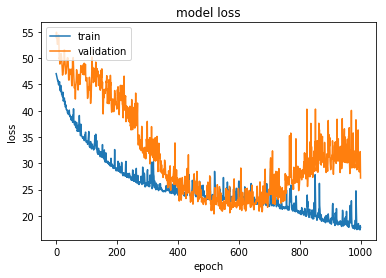

In [23]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
Xnew = np.array([['0.006320','18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=['0.006320' '18.000000' '2.310000' '0.000000' '0.538000' '6.575000'
 '65.200000' '4.090000' '1.000000' '296.000000' '15.300000' '396.900000'
 '4.980000'], Predicted=[32.526493]


In [72]:
cv = KFold(n_splits=10, random_state=42, shuffle=False)
cvscores = []

for train, test in cv.split(x, y):
  # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
#     model.summary()
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    # Fit the model
    model.fit(x[train], y[train], epochs=600, batch_size=50,  verbose=0)
    # evaluate the model
    scores = model.evaluate(x[test], y[test], verbose=1)
    print("%s: %.2f" % (model.metrics_names[1], scores[1]))
    cvscores.append(scores[1])
    

51/51 [==============================] - 2s 32ms/step
mean_squared_error: 14.50
51/51 [==============================] - 2s 31ms/step
mean_squared_error: 12.97
51/51 [==============================] - 2s 31ms/step
mean_squared_error: 4.88
51/51 [==============================] - 2s 32ms/step
mean_squared_error: 39.33
51/51 [==============================] - 2s 32ms/step
mean_squared_error: 49.44
51/51 [==============================] - 2s 42ms/step
mean_squared_error: 29.20
50/50 [==============================] - 2s 36ms/step
mean_squared_error: 14.04
50/50 [==============================] - 2s 35ms/step
mean_squared_error: 286.01
50/50 [==============================] - 2s 35ms/step
mean_squared_error: 23.97
50/50 [==============================] - 2s 34ms/step
mean_squared_error: 21.64


In [66]:
print("%.2f (+/- %.2f)" % (np.mean(cvscores), np.std(cvscores)))

31.31 (+/- 38.02)


In [67]:
print(cvscores)

[9.125394671571021, 11.364394393621707, 7.354928876839432, 49.893612805534815, 20.05379357057459, 20.25002109303194, 12.590499191284179, 140.03375518798828, 18.013976879119873, 24.384915771484376]


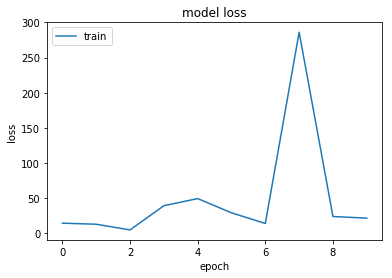

In [75]:
plt.plot(cvscores)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()